In [1]:
import matplotlib.pyplot as plt
from lib.DataWriter import DataWriter
inter_type = {
    0: 'Fourway',
    1: 'Traffic lights',
    2: 'Equivalent',
    4: 'Smart_lights'
}

In [2]:
def get_parameters(p_spawn=0.1, max_speed_horizontal=3, max_speed_vertical=3, intersection_type = 'Fourway'):
    t_traffic_light_cycle=5
    p_bend = 0.33
    p_u_turn = 0.01
    p_left = p_bend
    p_right = p_bend
    p_straight = p_bend
    t_from_north = t_traffic_light_cycle
    t_from_west = t_traffic_light_cycle
    t_from_east = t_traffic_light_cycle
    t_from_south = t_traffic_light_cycle


    parameters = {
        "max_speed_horizontal": max_speed_horizontal,
        "max_speed_vertical": max_speed_vertical,
        "alpha_factor": 5,
        "beta_factor": 2,
        "intersection_type": intersection_type,
        "t_from_north": t_from_north,
        "t_from_west": t_from_west,
        "t_from_east": t_from_east,
        "t_from_south": t_from_south,
        "p_car_spawn_north": p_spawn,
        "p_north_to_north": p_u_turn,
        "p_north_to_west": p_right,
        "p_north_to_east": p_left,
        "p_north_to_south": p_straight,
        "p_car_spawn_west": p_spawn,
        "p_west_to_north": p_left,
        "p_west_to_west": p_u_turn,
        "p_west_to_east": p_straight,
        "p_west_to_south": p_right,
        "p_car_spawn_east": p_spawn,
        "p_east_to_north": p_right,
        "p_east_to_west": p_straight,
        "p_east_to_east": p_u_turn,
        "p_east_to_south": p_left,
        "p_car_spawn_south": p_spawn,
        "p_south_to_north": p_straight,
        "p_south_to_west": p_left,
        "p_south_to_east": p_right,
        "p_south_to_south": p_u_turn,
    }
    return parameters


In [45]:
import random 
fourway = []
traffic_lights = []
equivalent = []
smart_lights = []

for run_id in random.sample(range(1,10000),100):
    datawriter = DataWriter()
    data = datawriter.read_database(run_id)
    if data['parameters']['intersection_type'] == 'Fourway':
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        if throughput != 0:
            fourway.append([throughput,p_spawn,av_speed])
    elif data['parameters']['intersection_type'] == 'Traffic_lights':
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        if throughput != 0:
            traffic_lights.append([throughput,p_spawn,av_speed])
    elif data['parameters']['intersection_type'] == 'Equivalent':
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        if throughput != 0:
            equivalent.append([throughput,p_spawn,av_speed])
    else:
        throughput = data['results']['throughput'][-1]
        p_spawn = data['parameters']['p_car_spawn_east']
        av_speed = data['results']['average_speed'][-1]
        if throughput != 0:
            smart_lights.append([throughput,p_spawn,av_speed])
    print(run_id)
    
    

9781
6871
1853
6979
9156
6775
3021
8531
3171
3367
5815
8467
1046
5900
4791
7990
6338
108
9139
5256
8374
4209
6982
709
8474
1227
903
3386
6339
8732
3952
231
3649
8176
164
6318
4378
452
4734
1014
8974
2816
2740
9748
3395
4516
4357
3621
9042
1118
477
8923
8503
849
8851
9552
5116
3989
7323
6897
3042
579
5165
7863
1901
2076
372
9713
9827
5454
3413
5099
2722
9443
1445
299
5079
9939
78
553
6445
4884
7104
1883
8606
8975
2026
8412
844
3013
6971
5989
5560
2551
6279
3923
3916
515
6061
407


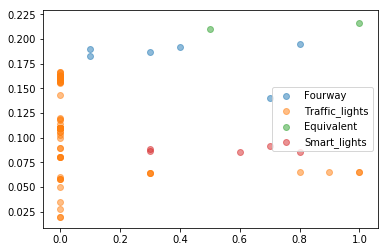

In [43]:
# set some parameters :


cross_dict = {'Fourway':fourway, 'Traffic_lights':traffic_lights, 'Equivalent':equivalent,'Smart_lights': smart_lights}
#print(cross_dict)
for key in cross_dict.keys():
    through = [x[0] for x in cross_dict[key]]
    p = [z[1] for z in cross_dict[key]]
    plt.scatter(p,through, alpha = .5, label = key)
        
plt.legend()
plt.show()

In [44]:
cross_dict = {'Fourway':fourway, 'Traffic_lights':traffic_lights, 'Equivalent':equivalent,'Smart_lights': smart_lights}

Text(0.5, 0, 'Car flow')

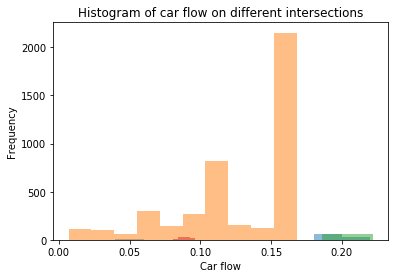

In [39]:
for key,values in cross_dict.items():
    fl = [x[0] for x in values]
    plt.hist(fl,bins = 10, label = key, alpha = .5)
plt.title('Histogram of car flow on different intersections')
plt.ylabel('Frequency')
plt.xlabel('Car flow')

Text(0.5, 0, 'Average Speed')

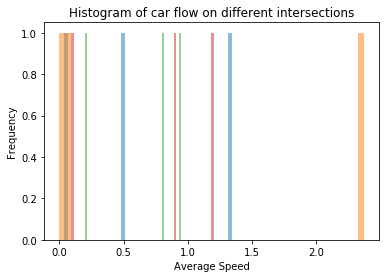

In [20]:
for key in cross_dict.keys():
    plt.hist(cross_dict[key][:][0],bins = 50, label = key, alpha = .5)
plt.title('Histogram of car flow on different intersections')
plt.ylabel('Frequency')
plt.xlabel('Average Speed')

In [21]:
keys = list(cross_dict.keys())

for key in cross_dict.keys():
    plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'